In [1]:
import scanpy as sc
from pathlib import Path
import pandas as pd
from muon import prot as pt
from muon import MuData
import muon as mu
import numpy as np

%load_ext autoreload
%autoreload 2
%load_ext lab_black

path_data = Path("/Users/giovanni.palla/Datasets/moscot")

In [2]:
adata_sc = sc.read(path_data / "adata_sc_processed.h5ad")
adata_p = sc.read(path_data / "adata_cite_processed.h5ad")

In [3]:
adata_spatial = sc.read(path_data / "scANVI_liver_object.h5ad")

In [4]:
print(adata_sc.shape, adata_spatial.shape)

(91040, 22647) (19698, 306)


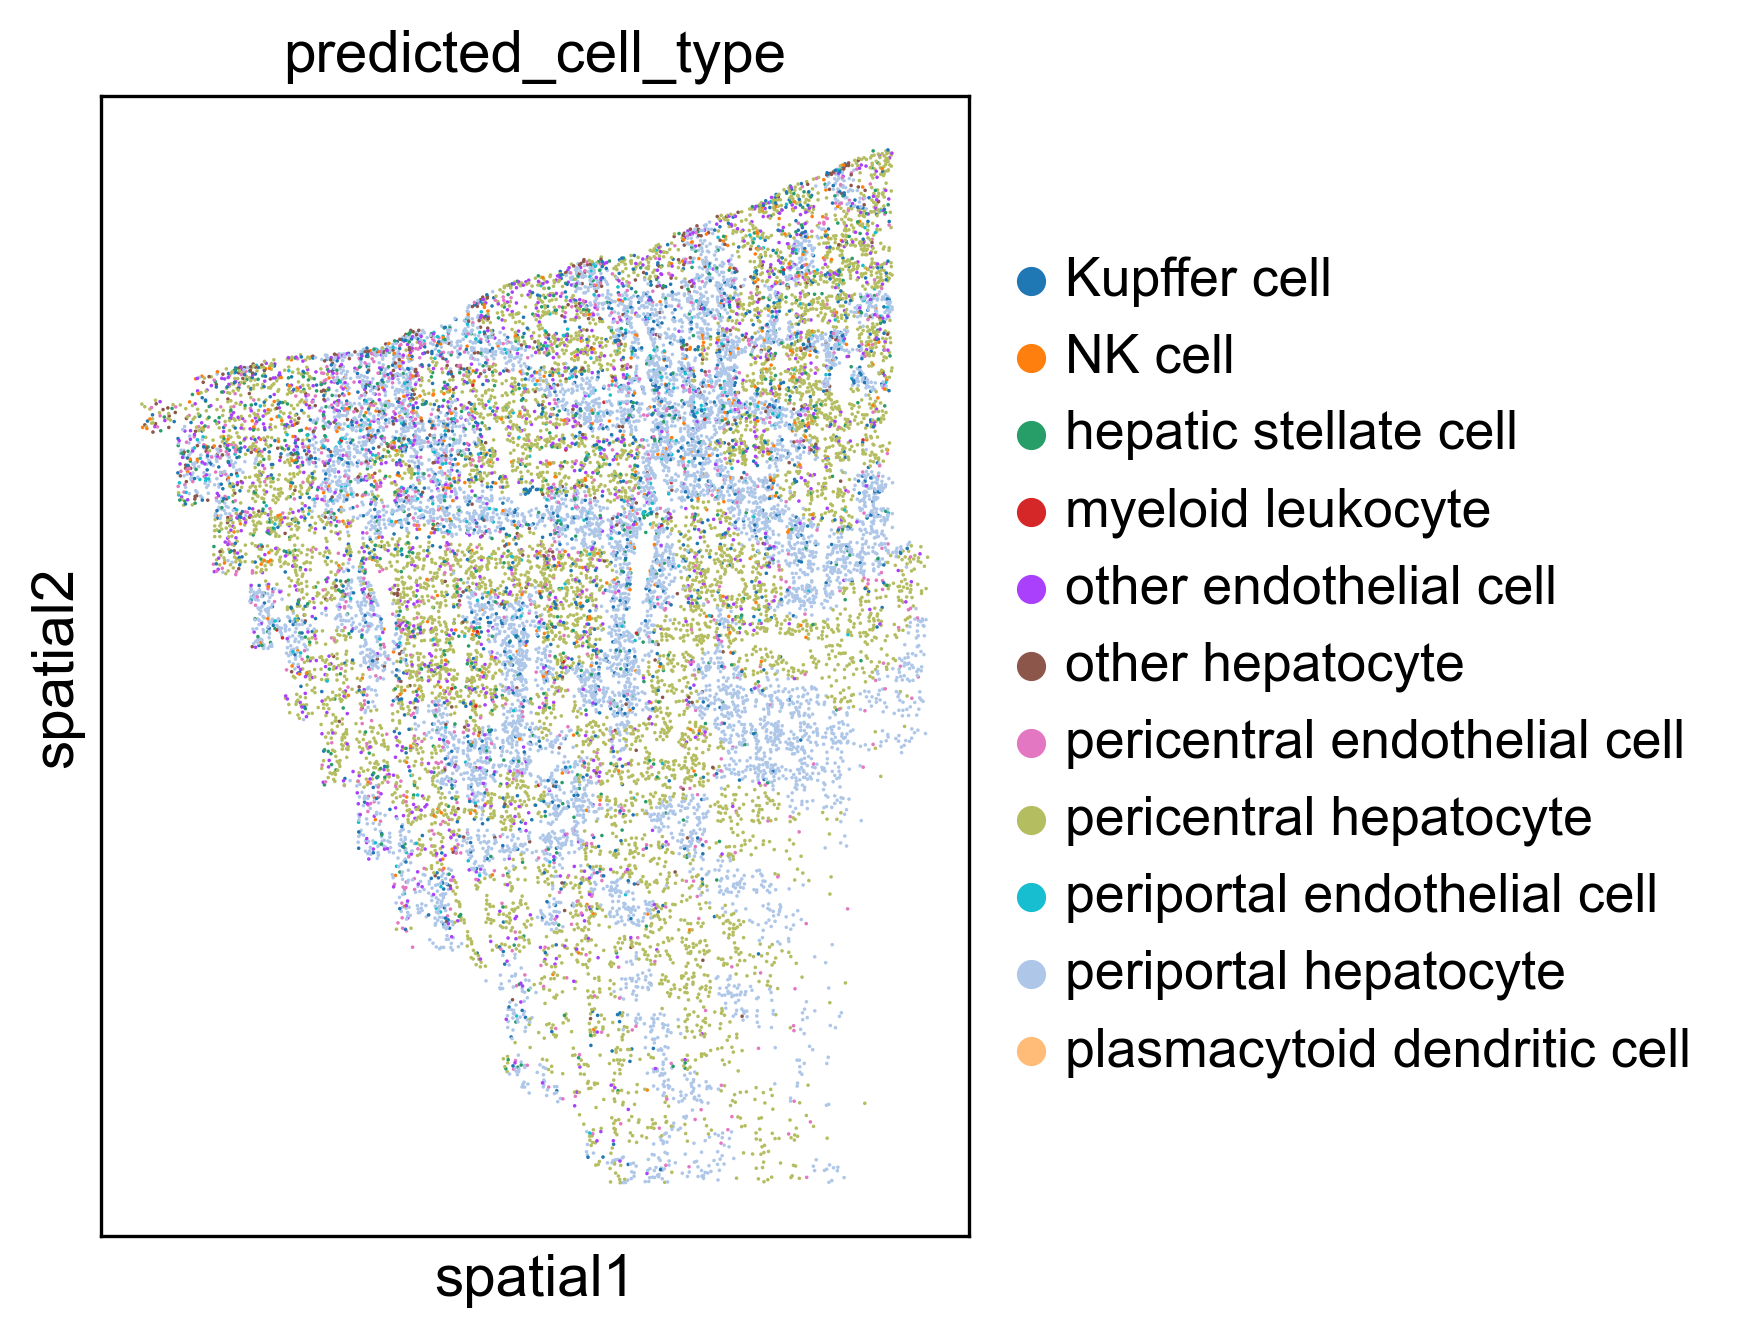

In [5]:
sc.set_figure_params(figsize=(5, 5), dpi=150)
sc.pl.spatial(adata_spatial, spot_size=20, color="predicted_cell_type")

In [6]:
adata_spatial.var_names = [v.capitalize() for v in adata_spatial.var_names.values]

In [7]:
adata_spatial.var_names

Index(['Sox17', 'Zap70', 'Slc40a1', 'Sdpr', 'Cxcr2', 'Des', 'Scg2', 'Marco',
       'Faim3', 'Prelp',
       ...
       'Ccr2', 'Pcsk1n', 'Cybb', 'Cfp', 'Bgn', 'F8', 'Vsig4', 'Tmem27', 'Ace2',
       'Tlr7'],
      dtype='object', length=306)

In [8]:
adata_sc.var_names

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Mrpl15', 'Lypla1',
       'Gm37988', 'Tcea1', 'Rgs20',
       ...
       'AC132444.6', 'Gm10931', 'CT868723.1', 'AC125149.3', 'AC125149.2',
       'AC168977.2', 'AC168977.1', 'AC149090.1', 'CAAA01118383.1',
       'CAAA01147332.1'],
      dtype='object', length=22647)

In [9]:
var_names = list(
    set(adata_sc.var_names.values).intersection(adata_spatial.var_names.values)
)
len(var_names)

280

In [10]:
adata_spatial

AnnData object with n_obs × n_vars = 19698 × 306
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'integrated_manually_annotated', 'batch', 'n_counts', 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'max_x', 'min_y', 'max_y', 'median average DAPI', 'mean average DAPI', 'dataset', 'barcodeCount', 'tech', 'celltype_scanvi', '_scvi_batch', '_scvi_labels', 'predicted_cell_type'
    var: 'n_cells-scRNA-seq'
    uns: 'C_scANVI_colors', '_scvi', 'neighbors', 'tech_colors', 'umap', 'predicted_cell_type_colors'
    obsm: 'X_scANVI', 'X_umap', 'spatial'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [11]:
from moscot.problems.space import MappingProblem

problem = (
    MappingProblem(adata_sc, adata_spatial).prepare(
        # batch_key="batch",
        sc_attr={"attr": "obsm", "key": "X_pca"},
        spatial_key="spatial",
        var_names=var_names,
    )
    # .solve(alpha=0.5, epsilon=1e-2)
)

In [ ]:
problem.solve(alpha=0.5, epsilon=1e-2, rank=100)

In [1]:
adata_sc.shape

NameError: name 'adata_sc' is not defined

In [19]:
problem.problems[("src", "ref")].xy[1].data.shape

(91040, 280)